## **Predicting Body Mass Index**

Aim:    PANDAS, NUMPY, sqlalchemy,pyodbc, PANDAS_PROFILING, SEABORN, MATPLOTLIB, SKLEARN, XGBOOST, KAGGLE

In [19]:
# Importing project dependencies 
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine
import pyodbc
import urllib
%matplotlib inline

import pickle
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
import math
from sklearn import metrics

#### **----------------------------------  1. Data collection  -----------------------------------**

In [2]:
# Importing data through API 
!kaggle datasets download -d yasserh/bmidataset -p ..\Data --unzip 


  0%|          | 0.00/2.19k [00:00<?, ?B/s]
100%|██████████| 2.19k/2.19k [00:00<00:00, 2.24MB/s]


In [3]:
# Reading data into dataframe 
data = pd.read_csv('../Data/bmi.csv')

#### **----------------------------------  2. Data pre-processing  -----------------------------------**

In [4]:
# Viewing first 5 rows of data
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
# Viewing dataset shape
data.shape

(500, 4)

In [6]:
# 1st check for null values and datatype check 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
# 2nd check for null values
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [8]:
# Unique count for each variable
data.nunique()

Gender      2
Height     60
Weight    110
Index       6
dtype: int64

In [9]:
# Checking distribution of categorical fields 
print(data.Gender.value_counts())
print(data.Index.value_counts())

Female    255
Male      245
Name: Gender, dtype: int64
5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64


In [10]:
# Viewing summary of statistics for numeric columns
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [11]:
# Formatting column headers by removing potential capital letters and spaces in column headers
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')

In [12]:
data.iloc[:,0]

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
495    Female
496    Female
497    Female
498      Male
499      Male
Name: gender, Length: 500, dtype: object

#### **----------------------------------  3. Data Warehousing  -----------------------------------**

In [45]:
def ETL_SQLServer(Server,db,tablename):
  """
    :param Server: Destination Server
    :param db: Destination Database name MUST ALREADY EXIST
    :param tablename: Project ID and Dataset name
    """

  # SQL table header format
  tablename = tablename.lower()
  tablename = tablename.replace(' ','_')

  quoted = urllib.parse.quote_plus("DRIVER={SQL Server};SERVER=%s;DATABASE=%s"%(Server,db))
  engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

  data.to_sql('{tb}'.format(tb=tablename), schema='dbo', con = engine, index=False, if_exists='replace')

  return("ETL successful, {num} rows loaded into table: {tb}.".format(num=len(data.iloc[:,0]), tb=tablename))

In [46]:
# Function to warehouse dataframe
ETL_SQLServer("[SERVER NAME]","Projects","P11 bmi")

'ETL successful, 500 rows loaded into table: p11_bmi.'

#### **----------------------------------  4. Exploratory data analysis  -----------------------------------**

In [13]:
#correlation of each variable
data.corr()

,height,weight,index
height,1.000000,0.000446,-0.422223
weight,0.000446,1.000000,0.804569
index,-0.422223,0.804569,1.000000


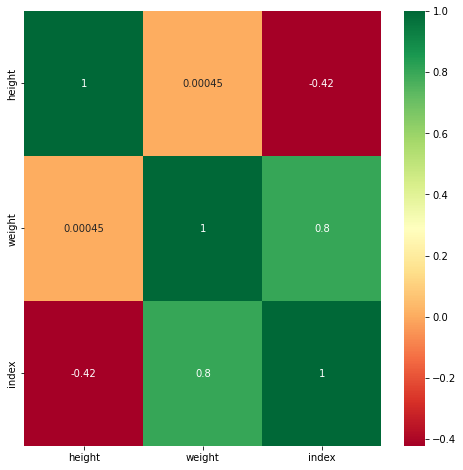

In [22]:
# Viewing correlations of each features in dataset 
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))

# Plotting heat map
plot = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
print(corrmat.index)

Index(['height', 'weight', 'index'], dtype='object')


#### **----------------------------------  5. Feature Engineering  -----------------------------------**